In [1]:
import numpy as np

def resize_axis(array, N):
    if(array.shape[1] > N):
        resized = array[:,:N]
    else:
        resized = np.lib.pad(array, ((0,0),(0,N - array.shape[1])),\
            'constant', constant_values=(np.min(array)))
    return resized
        

In [2]:
CNN_INPUT_SIZE = (128, 20)
DEFAULT_SR = 22050

def extract_cnn_input(raw_audio):
    frame_length = min(2048, len(raw_audio))
    mel_spec = librosa.core.power_to_db(librosa.feature.melspectrogram(
        y=raw_audio, sr=DEFAULT_SR, n_fft=frame_length,
        hop_length=frame_length//4, n_mels=CNN_INPUT_SIZE[0])
    )
    # Truncate number of frames stored
    m = min(CNN_INPUT_SIZE[1], mel_spec.shape[1])
    print(mel_spec.shape[1])
    N =20
    mell = resize_axis(mel_spec[:, 0:m], N)
    return mell

In [3]:
CNN_INPUT_SIZE = (128, 20)

In [4]:
DEFAULT_SR = 22050

29


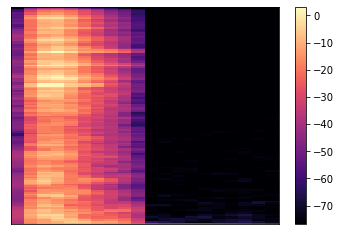

In [47]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

# from past.utils import old_div

y, sr = librosa.load("D:\Drum\HiHat\hat 2 SMOKE.wav")
#y, sr = librosa.load("D:\Drum\HiHat\!Hat 39.wav")
#y, sr = librosa.load('/Users/cooky/HDD/Drum/Dilla Drums/!Snare 170.wav')
#y, sr = librosa.load('/Users/cooky/HDD/Drum/illmind blap kit 7/KICK_FUELO.wav')
#y, sr = librosa.load('/Users/cooky/HDD/Drum/Dilla Drums/!Snare 170.wav')

#print(y.shape)

yt, index = librosa.effects.trim(y=y, top_db=30)



yt = librosa.util.normalize(yt)

#print(yt)

#D = librosa.stft(yt)  # STFT of y

# print(D.shape)

# mel = librosa.feature.melspectrogram(
#         S=D, sr=DEFAULT_SR,
#         hop_length=1024, n_mels=128)


#S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

#resized_S_db = resize_axis(S_db)

#print(S_db.shape)

k = extract_cnn_input(y)

plt.figure()
librosa.display.specshow(k)
plt.colorbar()


# plt.figure()
# librosa.display.specshow(mel)
# plt.colorbar()

----

C Q T

In [15]:
C = np.abs(librosa.cqt(yt, sr=sr))

c:\Users\cid2r\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=256 is too small for input signal of length=160
  return f(*args, **kwargs)
c:\Users\cid2r\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=256 is too small for input signal of length=80
  return f(*args, **kwargs)


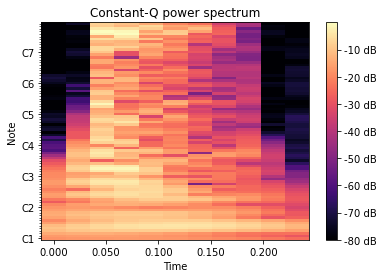

In [16]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
k = librosa.amplitude_to_db(C, ref=np.max)

In [17]:
k.shape

(84, 11)

zcr

In [18]:
z = librosa.feature.zero_crossing_rate(yt)

In [19]:
z

array([[0.08007812, 0.19140625, 0.30419922, 0.40136719, 0.42333984,
        0.41162109, 0.37939453, 0.27783203, 0.17919922, 0.07958984,
        0.        ]])

spectral bandwidth

In [20]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))

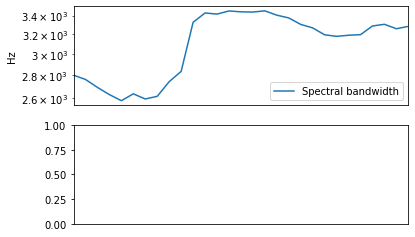

In [21]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
#librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
#ax[1].set(title='log Power spectrogram')

# ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]), np.minimum(centroid[0] + spec_bw[0], sr/2), alpha=0.5, label='Centroid +- bandwidth')
# ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
# ax[1].legend(loc='lower right')

In [25]:
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def butter_lowpass(cutoff, fs, order=9):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=9):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [30]:
cutoff = 30
Fs = 2000

lpf = butter_lowpass_filter(yt, cutoff, Fs, order=0)

In [53]:
#Creation of the filter
sf = 22050
cutOff = 1000 # Cutoff frequency
nyq = 0.5 * sf
N  = 6    # Filter order
fc = cutOff / nyq # Cutoff frequency normal
b, a = butter(N, fc)

In [31]:
yt

array([-1.3464093e-04, -1.7939409e-04, -9.8637218e-05, ...,
       -2.8159400e-04, -2.2703124e-04, -2.3554967e-04], dtype=float32)

In [32]:
lpf

array([-1.34640926e-04, -1.79394090e-04, -9.86372179e-05, ...,
       -2.81593995e-04, -2.27031240e-04, -2.35549669e-04])

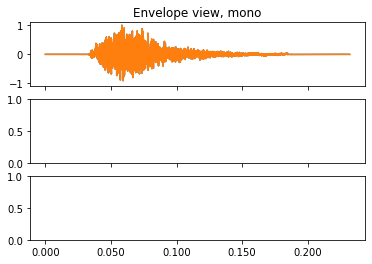

In [51]:
#import matplotlib.pyplot as plt
#y, sr = librosa.load(librosa.ex('choice'), duration=10)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(yt, sr=sr, ax=ax[0])
librosa.display.waveshow(lpf, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()